In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy.stats import lognorm
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline



forest = pd.read_csv('./csv/forest.csv', sep = ',')
forest_area = pd.read_csv('./csv/forest_area.csv', sep = ',')
brazil_loss = pd.read_csv('./csv/brazil_loss.csv', sep = ',')
soybean_use = pd.read_csv('./csv/soybean_use.csv', sep = ',')
vegetable_oil = pd.read_csv('./csv/vegetable_oil.csv', sep = ',')
population = pd.read_csv('./csv/population.csv', index_col=[0], sep = ',')
pd.set_option("max_rows", 200)
sns.set_style('darkgrid')
def tamanhoPlot(x, y):
    fig_dims = (x, y)
    fig, ax = plt.subplots(figsize=fig_dims)
    return ax

In [379]:
def filtro(df):
    df1 = df[(df.Código.notna()) & (df['Entidade'] != 'World')]
    df1.dropna(inplace=True)
    return df1

In [380]:
data = filtro(forest)
data.sort_values(['Conversão_líquida_de_floresta'], inplace=True)
data

/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entidade,Código,Ano,Conversão_líquida_de_floresta
47,Brazil,BRA,2000,-3950790.0
46,Brazil,BRA,1990,-3780940.0
195,Indonesia,IDN,1990,-1726500.0
48,Brazil,BRA,2010,-1539180.0
49,Brazil,BRA,2015,-1453040.0
...,...,...,...,...
14,Australia,AUS,2010,709680.0
83,China,CHN,2010,1936770.0
84,China,CHN,2015,1936790.0
81,China,CHN,1990,1986000.0


In [381]:
data_area = forest_area[(forest_area.Código.notna()) &(forest_area['Entidade'] != 'World')]
data_f = filtro(forest)
data_area.sort_values('Área_de_Floresta', ascending=False, inplace=True)

data = pd.merge(data_f, data_area)
data.sort_values(['Área_de_Floresta'], ascending=False, inplace=True)
data_vo = filtro(vegetable_oil)
data_test = data_vo.groupby(['Entidade','Código','Ano']).Produção_Óleo.sum().reset_index()
data = pd.merge(data, data_test)
data


/home/luan/miniconda3/envs/myenv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entidade,Código,Ano,Conversão_líquida_de_floresta,Área_de_Floresta,Produção_Óleo
0,Russia,RUS,2010,-41030.0,19.850775,3007851.0
1,Russia,RUS,2000,586710.0,19.462697,1416153.0
2,Brazil,BRA,1990,-3780940.0,13.900798,3124141.0
3,Brazil,BRA,2000,-3950790.0,13.253538,4509564.0
4,Brazil,BRA,2010,-1539180.0,12.458385,7722526.0
...,...,...,...,...,...,...
278,Maldives,MDV,2000,0.0,0.000020,1447.0
279,Maldives,MDV,1990,0.0,0.000019,1224.0
280,Tokelau,TKL,1990,0.0,0.000000,29.0
281,Tokelau,TKL,2000,0.0,0.000000,29.0


In [382]:
data = pd.merge(data, population)

data['Perde'] = np.select((data.Conversão_líquida_de_floresta<0, data.Conversão_líquida_de_floresta>0), (1,0), 1)
data_string, data_value,  y, target = data.iloc[:,:3], data.iloc[:,4:7], data.iloc[:,3:4], data.iloc[:,7:8]


# Exploratore Analysis

In [383]:
mono = pd.DataFrame({'Estatísticas' : ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '1º Quartil', 'Mediana', '3º Quartil', 'Máximo', 'Distorção'],
                     'Área de Floresta %': [data.Área_de_Floresta.count(), data.Área_de_Floresta.mean(), data.Área_de_Floresta.std(),
                                          data.Área_de_Floresta.min(), data.Área_de_Floresta.quantile(.25), data.Área_de_Floresta.quantile(.50),
                                          data.Área_de_Floresta.quantile(.75), data.Área_de_Floresta.max(), data.Área_de_Floresta.skew()],
                     'Produção de Óleo': [data.Produção_Óleo.count(), data.Produção_Óleo.mean(), data.Produção_Óleo.std(),
                                          data.Produção_Óleo.min(), data.Produção_Óleo.quantile(.25), data.Produção_Óleo.quantile(.50),
                                          data.Produção_Óleo.quantile(.75), data.Produção_Óleo.max(), data.Produção_Óleo.skew()],
                     'População': [data.População.count(), data.População.mean(), data.População.std(),
                                          data.População.min(), data.População.quantile(.25), data.População.quantile(.50),
                                          data.População.quantile(.75), data.População.max(), data.População.skew()]})
mono

,Estatísticas,Área de Floresta %,Produção de Óleo,População
0,Contagem,260.000000,2.600000e+02,2.600000e+02
1,Média,0.891752,7.650162e+05,5.352181e+07
2,Desvio Padrão,2.507602,2.134971e+06,1.763970e+08
3,Mínimo,0.000019,1.800000e+01,1.192110e+05
4,1º Quartil,0.045767,1.531350e+04,4.336882e+06
5,Mediana,0.176241,7.677350e+04,1.022095e+07
6,3º Quartil,0.543165,3.640425e+05,3.247578e+07
7,Máximo,19.850775,1.948291e+07,1.337705e+09
8,Distorção,5.178593,4.877443e+00,5.948668e+00


# A distorção dos dados é bem alta, então uma transformação de dados se torna necessária

In [384]:
data_value.Área_de_Floresta = np.log(data_value.Área_de_Floresta)
data_value.Produção_Óleo = np.log(data_value.Produção_Óleo)
data_value.População = np.log(data_value.População)


In [385]:
power = PowerTransformer(method='yeo-johnson')
aux = pd.DataFrame(y)
y =  power.fit_transform(aux)
data_y = pd.DataFrame(y, index=aux.index, columns=aux.columns)
data_y


,Conversão_líquida_de_floresta
0,-0.043033
1,1.660172
2,-7.318965
3,-7.645172
4,-2.990438
...,...
255,0.042100
256,0.042100
257,0.041754
258,0.041754


<AxesSubplot:xlabel='Conversão_líquida_de_floresta', ylabel='Count'>

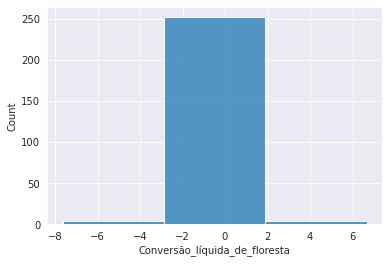

In [386]:
sns.histplot(data_y.Conversão_líquida_de_floresta,bins=3)

<AxesSubplot:xlabel='Área_de_Floresta', ylabel='Count'>

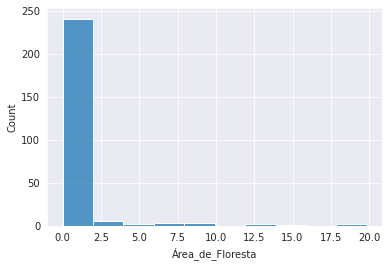

In [387]:
sns.histplot(data.Área_de_Floresta, bins=10)

<AxesSubplot:xlabel='Área_de_Floresta', ylabel='Count'>

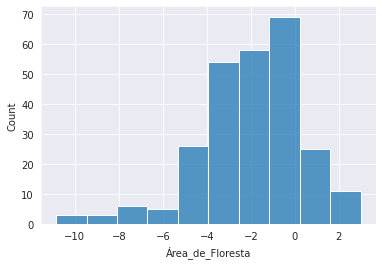

In [388]:
sns.histplot(data_value.Área_de_Floresta, bins=10)

<AxesSubplot:xlabel='Produção_Óleo', ylabel='Count'>

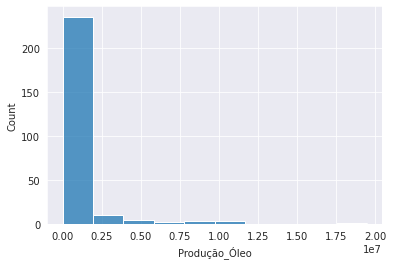

In [389]:
sns.histplot(data.Produção_Óleo, bins=10)

<AxesSubplot:xlabel='Produção_Óleo', ylabel='Count'>

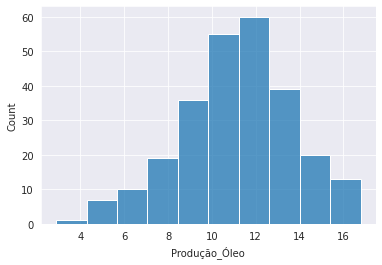

In [390]:
sns.histplot(data_value.Produção_Óleo, bins=10)

<AxesSubplot:xlabel='População', ylabel='Count'>

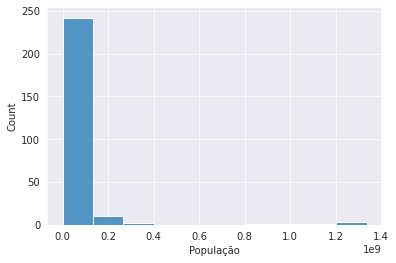

In [391]:
sns.histplot(data.População, bins=10)

<AxesSubplot:xlabel='População', ylabel='Count'>

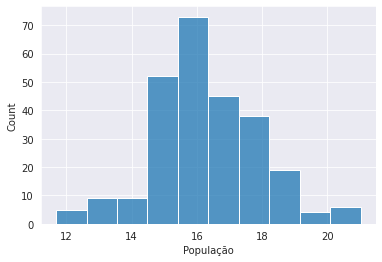

In [392]:
sns.histplot(data_value.População, bins=10)

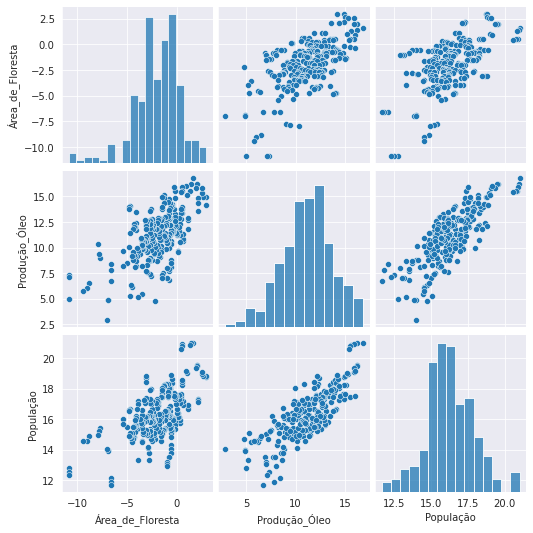

In [393]:
sns.pairplot(data=data_value)

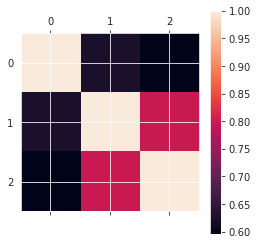

,Área_de_Floresta,Produção_Óleo,População
Área_de_Floresta,1.000000,0.626026,0.596391
Produção_Óleo,0.626026,1.000000,0.796013
População,0.596391,0.796013,1.000000


In [394]:
data.sort_values(['Conversão_líquida_de_floresta'], inplace=True)

plt.matshow(data_value.corr())
cb = plt.colorbar()

plt.show()
data_value.corr()

# PCA


In [395]:
x = data_value.values
x = StandardScaler().fit_transform(x)
y = target.values
target.describe()

,Perde
count,260.000000
mean,0.573077
std,0.495585
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [406]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, target], axis = 1)


,PC1,PC2,Perde
count,2.600000e+02,2.600000e+02,260.000000
mean,3.552714e-16,1.485991e-16,0.573077
std,1.535821e+00,6.703753e-01,0.495585
min,-3.895307e+00,-1.683132e+00,0.000000
25%,-9.233957e-01,-3.781373e-01,0.000000
50%,-4.481385e-02,-5.975965e-02,1.000000
75%,8.797715e-01,4.710137e-01,1.000000
max,4.742504e+00,1.756089e+00,1.000000


In [397]:

fig = px.scatter(principalComponents, x=0, y=1, color=finalDf['Perde'], color_continuous_scale=["green", "red"])
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')


fig.show()

In [398]:
pca.fit(finalDf)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [399]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features  = ['Área de Floresta', 'Produção de Óleo', 'População']
fig = px.scatter(principalComponents, x=0, y=1, color=finalDf['Perde'], color_continuous_scale=["green", "red"])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

# Regressão Linear

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [415]:
X = finalDf[['PC1', 'PC2']]
yt = data_y[['Conversão_líquida_de_floresta']]

X_train, X_test, Y_train, Y_test = train_test_split(X, yt, test_size=0.75 )


In [416]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [417]:
print('R² = {}'.format(modelo.score(X_train, Y_train).round(3)))

R² = 0.166


In [418]:
y_previsto = modelo.predict(X_test)
metrics.r2_score(Y_test, y_previsto).round(3)

-0.076